In [12]:
import geopandas as gpd 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
%matplotlib inline

In [13]:
#Read shapefiles
world_data = gpd.read_file(r's3://ecb-hackathon-data-group08-x19s00/economic_data/regional_boundaries/NUTS_RG_20M_2021_3035.shp') 

In [14]:
nuts3map = world_data[world_data.LEVL_CODE==3]

#Load benchmark data
df = pd.read_csv("Benchmark_df.csv")

dfClimateData = df[['year', 'NUTS_ID','LF_average_a', 'LF_std_a',
       'LF_count_a', 'LF_max_a', 'LF_min_a', 'LF_LTA_mean', 'LF_LTA_std',
       'LF_LTA_min', 'LF_LTA_max', 'LF_Average_Deviation_LTA',
       'maxTemp_MEDIAN', 'median_intensity', 'MEDIAN_spa01', 'MEDIAN_spa03',
       'MEDIAN_spa06', 'MEDIAN_spa12', 'NUTS_CODE', 'SMA_MEDIAN_mean',
       'SMA_MEDIAN_std', 'SMA_MEDIAN_count', 'SMA_MEDIAN_max',
       'SMA_MEDIAN_min', 'SMA_MEDIAN_LTA_mean', 'SMA_MEDIAN_LTA_std',
       'SMA_MEDIAN_LTA_min', 'SMA_MEDIAN_LTA_max',
       'SMA_MEDIAN_Average_Deviation_LTA', 'Heat_MildDrought_Short_Sum',
       'Heat_ModerateDrought_Short_Sum', 'Heat_SevereDrought_Short_Sum',
       'Heat_ExtremeDrought_Short_Sum', 'Heat_MildDrought_Long_Sum',
       'Heat_ModerateDrought_Long_Sum', 'Heat_SevereDrought_Long_Sum',
       'Heat_ExtremeDrought_Long_Sum', 'HeatWave_Count_Sum',
       'Heat_MildDrought_Short', 'Heat_ModerateDrought_Short',
       'Heat_SevereDrought_Short', 'Heat_ExtremeDrought_Short',
       'Heat_MildDrought_Long', 'Heat_ModerateDrought_Long',
       'Heat_SevereDrought_Long', 'Heat_ExtremeDrought_Long', 'fapar_mean',
       'fapar_median', 'fapar_min']]


In [26]:
dfClimateData.describe()
print(dfClimateData.columns)

Index(['year', 'NUTS_ID', 'LF_average_a', 'LF_std_a', 'LF_count_a', 'LF_max_a',
       'LF_min_a', 'LF_LTA_mean', 'LF_LTA_std', 'LF_LTA_min', 'LF_LTA_max',
       'LF_Average_Deviation_LTA', 'maxTemp_MEDIAN', 'median_intensity',
       'MEDIAN_spa01', 'MEDIAN_spa03', 'MEDIAN_spa06', 'MEDIAN_spa12',
       'NUTS_CODE', 'SMA_MEDIAN_mean', 'SMA_MEDIAN_std', 'SMA_MEDIAN_count',
       'SMA_MEDIAN_max', 'SMA_MEDIAN_min', 'SMA_MEDIAN_LTA_mean',
       'SMA_MEDIAN_LTA_std', 'SMA_MEDIAN_LTA_min', 'SMA_MEDIAN_LTA_max',
       'SMA_MEDIAN_Average_Deviation_LTA', 'Heat_MildDrought_Short_Sum',
       'Heat_ModerateDrought_Short_Sum', 'Heat_SevereDrought_Short_Sum',
       'Heat_ExtremeDrought_Short_Sum', 'Heat_MildDrought_Long_Sum',
       'Heat_ModerateDrought_Long_Sum', 'Heat_SevereDrought_Long_Sum',
       'Heat_ExtremeDrought_Long_Sum', 'HeatWave_Count_Sum',
       'Heat_MildDrought_Short', 'Heat_ModerateDrought_Short',
       'Heat_SevereDrought_Short', 'Heat_ExtremeDrought_Short',
       'He

In [73]:
#Function to plot a climate variable on a map (for a given year or average)

def plotDfAsMapWithColor(df, columnForColor, title_):
    #plot the map but also color code according to a chosen column (column name) from the (geo)dataframe
    #df[columnForColor] = minmaxscaler.fit_transform(df[columnForColor].values.reshape(-1, 1))
    #ax = df.plot(cmap = 'Greens', column = columnForColor, figsize = (10, 10),legend=True)
    df[columnForColor] = df[columnForColor].values
    ax = df.plot(cmap = 'RdBu', column = columnForColor, figsize = (8, 8),legend=True,legend_kwds={'shrink': 0.6})
    plt.yticks(color='w')
    plt.xticks(color='w')
    minx, miny, maxx, maxy = 20e5, 10e5, 70e5, 60e5
    plt.title(title_)
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.margins(0)
    #plt.savefig('figures/Nice looking pictures/SMA_MEDIAN_stdev_Avg_ByRegion.png')
    plt.show()
    #plt.savefig('figures/Nice looking pictures/FaparAvgByRegion.png')
    #cbar = plt.colorbar(ticks=[df['GVA'].min(), df['GVA'].max()])
    #cbar.ax.set_yticklabels(['Low GVA', 'High GVA'])

def plotAnyBenchmarkClimateVariableMeanOnMap(chosenVariableName, title_):
    df = pd.read_csv("Benchmark_df.csv")
    df_ = df[['year','NUTS_ID',chosenVariableName]]
    mean_per_NUTS = df_[['NUTS_ID',chosenVariableName]].groupby(['NUTS_ID']).mean()
    mean_per_NUTS = mean_per_NUTS.reset_index()
    mean_map = pd.merge(nuts3map,mean_per_NUTS)
    plotDfAsMapWithColor(mean_map, chosenVariableName, title_)



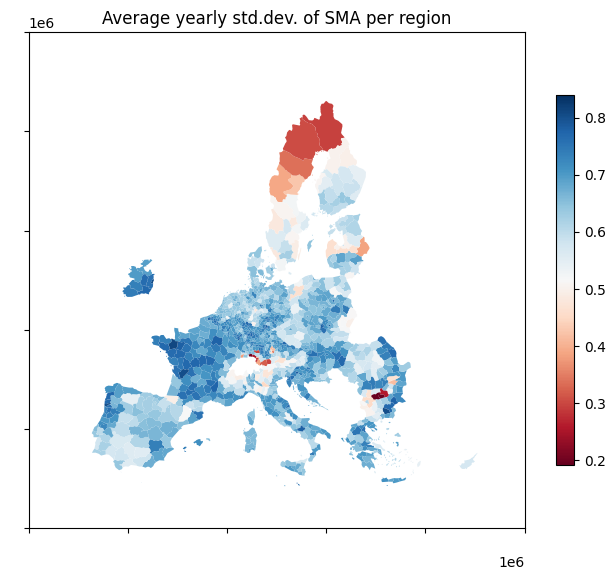

In [75]:
#FAPAR NB NEGATED the values plotAnyBenchmarkClimateVariableMeanOnMap('fapar_min','Average yearly minimum FAPAR value per region')
#SPA plotAnyBenchmarkClimateVariableMeanOnMap('MEDIAN_spa01','Average yearly median SPI 1M value per region')
plotAnyBenchmarkClimateVariableMeanOnMap('SMA_MEDIAN_std','Average yearly std.dev. of SMA per region')
#plotAnyBenchmarkClimateVariableMeanOnMap('HeatWave_Count_Sum','Average yearly std.dev. of SMA per region')


In [18]:
pd.plotting.scatter_matrix(dfClimateData[['LF_LTA_mean', 'MEDIAN_spa01', 'SMA_MEDIAN_mean',
       'Heat_ModerateDrought_Long','Heat_SevereDrought_Long', 'Heat_ExtremeDrought_Long', 'fapar_mean']], alpha=0.2)

array([[<Axes: xlabel='LF_LTA_mean', ylabel='LF_LTA_mean'>,
        <Axes: xlabel='MEDIAN_spa01', ylabel='LF_LTA_mean'>,
        <Axes: xlabel='SMA_MEDIAN_mean', ylabel='LF_LTA_mean'>,
        <Axes: xlabel='Heat_ModerateDrought_Long', ylabel='LF_LTA_mean'>,
        <Axes: xlabel='Heat_SevereDrought_Long', ylabel='LF_LTA_mean'>,
        <Axes: xlabel='Heat_ExtremeDrought_Long', ylabel='LF_LTA_mean'>,
        <Axes: xlabel='fapar_mean', ylabel='LF_LTA_mean'>],
       [<Axes: xlabel='LF_LTA_mean', ylabel='MEDIAN_spa01'>,
        <Axes: xlabel='MEDIAN_spa01', ylabel='MEDIAN_spa01'>,
        <Axes: xlabel='SMA_MEDIAN_mean', ylabel='MEDIAN_spa01'>,
        <Axes: xlabel='Heat_ModerateDrought_Long', ylabel='MEDIAN_spa01'>,
        <Axes: xlabel='Heat_SevereDrought_Long', ylabel='MEDIAN_spa01'>,
        <Axes: xlabel='Heat_ExtremeDrought_Long', ylabel='MEDIAN_spa01'>,
        <Axes: xlabel='fapar_mean', ylabel='MEDIAN_spa01'>],
       [<Axes: xlabel='LF_LTA_mean', ylabel='SMA_MEDIAN_mean'>,
 